<p><center><h3> Lab-5: CIFAR-10 Image Classification: Custom CNN vs AlexNet</h3></center>


## Project Overview
This notebook implements and compares two approaches for CIFAR-10 image classification:
1. Custom CNN architecture
2. AlexNet architecture adapted for CIFAR-10

### Dataset: CIFAR-10
- 60,000 32x32 color images in 10 classes
- 50,000 training images and 10,000 test images
- Classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck

In [1]:
# Import required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import time

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

print(f"TensorFlow version: {tf.__version__}")
print(f"GPU Available: {tf.config.list_physical_devices('GPU')}")

TensorFlow version: 2.19.0
GPU Available: []


In [2]:
# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")
print(f"Number of classes: {len(class_names)}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 247s 1us/step
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
Number of classes: 10


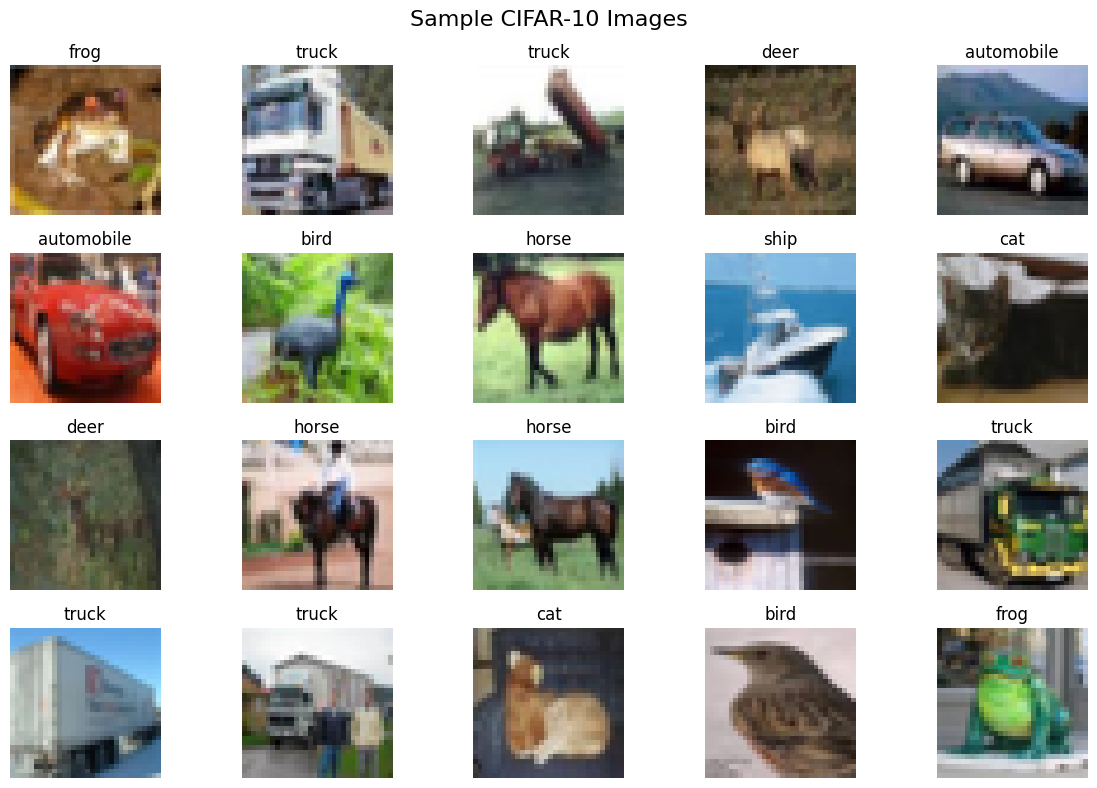

In [3]:
# Visualize sample images from CIFAR-10
plt.figure(figsize=(12, 8))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(f'{class_names[y_train[i][0]]}')
    plt.axis('off')
plt.suptitle('Sample CIFAR-10 Images', fontsize=16)
plt.tight_layout()
plt.show()

In [4]:
# Data preprocessing
# Normalize pixel values to [0, 1]
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

# Convert labels to categorical (one-hot encoding)
y_train_categorical = keras.utils.to_categorical(y_train, 10)
y_test_categorical = keras.utils.to_categorical(y_test, 10)

print(f"Normalized training data range: [{x_train_normalized.min():.2f}, {x_train_normalized.max():.2f}]")
print(f"Label shape after one-hot encoding: {y_train_categorical.shape}")

Normalized training data range: [0.00, 1.00]
Label shape after one-hot encoding: (50000, 10)


## Model 1: Custom CNN Architecture

In [5]:
def create_custom_cnn():
    """
    Create a custom CNN architecture optimized for CIFAR-10
    """
    model = models.Sequential([
        # First Convolutional Block
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        # Third Convolutional Block
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        # Fully Connected Layers
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    
    return model

# Create and compile custom CNN
custom_cnn = create_custom_cnn()
custom_cnn.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

print("Custom CNN Architecture:")
custom_cnn.summary()

Custom CNN Architecture:


c:\Users\sonam\miniconda3\envs\tf310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,472,938 (5.62 MB)

 Trainable params: 1,471,466 (5.61 MB)

 Non-trainable params: 1,472 (5.75 KB)

## Model 2: AlexNet Architecture (Adapted for CIFAR-10)

In [6]:
def create_alexnet_cifar10():
    """
    Create AlexNet architecture adapted for CIFAR-10 (32x32 input)
    Original AlexNet was designed for 224x224 images, so we adapt it for smaller CIFAR-10 images
    """
    model = models.Sequential([
        # First Convolutional Layer
        layers.Conv2D(96, (5, 5), strides=(1, 1), activation='relu', input_shape=(32, 32, 3), padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), strides=(2, 2)),
        
        # Second Convolutional Layer
        layers.Conv2D(256, (5, 5), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), strides=(2, 2)),
        
        # Third Convolutional Layer
        layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
        
        # Fourth Convolutional Layer
        layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
        
        # Fifth Convolutional Layer
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), strides=(2, 2)),
        
        # Fully Connected Layers
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    
    return model

# Create and compile AlexNet
alexnet_model = create_alexnet_cifar10()
alexnet_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

print("AlexNet Architecture (Adapted for CIFAR-10):")
alexnet_model.summary()

AlexNet Architecture (Adapted for CIFAR-10):


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 96)     │         7,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,324,554 (142.38 MB)

 Trainable params: 37,323,850 (142.38 MB)

 Non-trainable params: 704 (2.75 KB)

## Training Configuration and Callbacks

In [8]:
# Training configuration
EPOCHS = 50
BATCH_SIZE = 128
VALIDATION_SPLIT = 0.1

# Create callbacks for better training
def create_callbacks(model_name):
    return [
        keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=10,
            restore_best_weights=True
        ),
        keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.2,
            patience=5,
            min_lr=0.0001
        ),
        keras.callbacks.ModelCheckpoint(
            f'best_{model_name}_model.h5',
            monitor='val_accuracy',
            save_best_only=True,
            verbose=1
        )
    ]

## Training Custom CNN

In [9]:
print("Training Custom CNN...")
start_time = time.time()

# Train custom CNN
custom_cnn_history = custom_cnn.fit(
    x_train_normalized, y_train_categorical,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=VALIDATION_SPLIT,
    callbacks=create_callbacks('custom_cnn'),
    verbose=1
)

custom_cnn_training_time = time.time() - start_time
print(f"Custom CNN training completed in {custom_cnn_training_time:.2f} seconds")

Training Custom CNN...
Epoch 1/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 0.2748 - loss: 2.3250
Epoch 1: val_accuracy improved from -inf to 0.13780, saving model to best_custom_cnn_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 95s 262ms/step - accuracy: 0.2750 - loss: 2.3238 - val_accuracy: 0.1378 - val_loss: 3.5067 - learning_rate: 0.0010
Epoch 2/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.4945 - loss: 1.3935
Epoch 2: val_accuracy improved from 0.13780 to 0.61080, saving model to best_custom_cnn_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 98s 278ms/step - accuracy: 0.4946 - loss: 1.3933 - val_accuracy: 0.6108 - val_loss: 1.0849 - learning_rate: 0.0010
Epoch 3/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.5989 - loss: 1.1317
Epoch 3: val_accuracy improved from 0.61080 to 0.68460, saving model to best_custom_cnn_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 106s 302ms/step - accuracy: 0.5990 - loss: 1.1316 - val_accuracy: 0.6846 - val_loss: 0.8906 - learning_rate: 0.0010
Epoch 4/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - accuracy: 0.6575 - loss: 0.9667
Epoch 4: val_accuracy improved from 0.68460 to 0.72220, saving model to best_custom_cnn_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 98s 278ms/step - accuracy: 0.6575 - loss: 0.9666 - val_accuracy: 0.7222 - val_loss: 0.7877 - learning_rate: 0.0010
Epoch 5/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - accuracy: 0.6947 - loss: 0.8690
Epoch 5: val_accuracy improved from 0.72220 to 0.73740, saving model to best_custom_cnn_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 98s 278ms/step - accuracy: 0.6947 - loss: 0.8690 - val_accuracy: 0.7374 - val_loss: 0.7482 - learning_rate: 0.0010
Epoch 6/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.7228 - loss: 0.7964
Epoch 6: val_accuracy improved from 0.73740 to 0.75320, saving model to best_custom_cnn_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 102s 289ms/step - accuracy: 0.7228 - loss: 0.7963 - val_accuracy: 0.7532 - val_loss: 0.7146 - learning_rate: 0.0010
Epoch 7/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - accuracy: 0.7441 - loss: 0.7372
Epoch 7: val_accuracy improved from 0.75320 to 0.76140, saving model to best_custom_cnn_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 98s 279ms/step - accuracy: 0.7441 - loss: 0.7372 - val_accuracy: 0.7614 - val_loss: 0.6839 - learning_rate: 0.0010
Epoch 8/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.7626 - loss: 0.6890
Epoch 8: val_accuracy did not improve from 0.76140
352/352 ━━━━━━━━━━━━━━━━━━━━ 107s 303ms/step - accuracy: 0.7626 - loss: 0.6889 - val_accuracy: 0.7228 - val_loss: 0.8687 - learning_rate: 0.0010
Epoch 9/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.7758 - loss: 0.6463
Epoch 9: val_accuracy improved from 0.76140 to 0.78140, saving model to best_custom_cnn_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 96s 272ms/step - accuracy: 0.7758 - loss: 0.6463 - val_accuracy: 0.7814 - val_loss: 0.6287 - learning_rate: 0.0010
Epoch 10/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 0.7930 - loss: 0.6070
Epoch 10: val_accuracy improved from 0.78140 to 0.79080, saving model to best_custom_cnn_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 97s 276ms/step - accuracy: 0.7930 - loss: 0.6070 - val_accuracy: 0.7908 - val_loss: 0.6118 - learning_rate: 0.0010
Epoch 11/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - accuracy: 0.8022 - loss: 0.5786
Epoch 11: val_accuracy improved from 0.79080 to 0.80860, saving model to best_custom_cnn_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 98s 278ms/step - accuracy: 0.8022 - loss: 0.5786 - val_accuracy: 0.8086 - val_loss: 0.5461 - learning_rate: 0.0010
Epoch 12/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.8121 - loss: 0.5478
Epoch 12: val_accuracy did not improve from 0.80860
352/352 ━━━━━━━━━━━━━━━━━━━━ 99s 280ms/step - accuracy: 0.8121 - loss: 0.5477 - val_accuracy: 0.8056 - val_loss: 0.5720 - learning_rate: 0.0010
Epoch 13/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 0.8216 - loss: 0.5211
Epoch 13: val_accuracy improved from 0.80860 to 0.82400, saving model to best_custom_cnn_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 110s 312ms/step - accuracy: 0.8216 - loss: 0.5211 - val_accuracy: 0.8240 - val_loss: 0.5214 - learning_rate: 0.0010
Epoch 14/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.8286 - loss: 0.4974
Epoch 14: val_accuracy did not improve from 0.82400
352/352 ━━━━━━━━━━━━━━━━━━━━ 107s 305ms/step - accuracy: 0.8287 - loss: 0.4974 - val_accuracy: 0.7938 - val_loss: 0.6599 - learning_rate: 0.0010
Epoch 15/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 0.8306 - loss: 0.4817
Epoch 15: val_accuracy did not improve from 0.82400
352/352 ━━━━━━━━━━━━━━━━━━━━ 135s 384ms/step - accuracy: 0.8306 - loss: 0.4816 - val_accuracy: 0.8112 - val_loss: 0.5695 - learning_rate: 0.0010
Epoch 16/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.8414 - loss: 0.4607
Epoch 16: val_accuracy did not improve from 0.82400
352/352 ━━━━━━━━━━━━━━━━━━━━ 102s 289ms/step - accuracy: 0.8414 - loss: 0.4607 - val_accuracy: 0.8212 - val_loss: 0.5678 - learning_rate: 0.00

352/352 ━━━━━━━━━━━━━━━━━━━━ 97s 277ms/step - accuracy: 0.8556 - loss: 0.4211 - val_accuracy: 0.8294 - val_loss: 0.5335 - learning_rate: 0.0010
Epoch 19/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.8729 - loss: 0.3680
Epoch 19: val_accuracy improved from 0.82940 to 0.85640, saving model to best_custom_cnn_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 99s 281ms/step - accuracy: 0.8729 - loss: 0.3679 - val_accuracy: 0.8564 - val_loss: 0.4558 - learning_rate: 2.0000e-04
Epoch 20/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - accuracy: 0.8899 - loss: 0.3207
Epoch 20: val_accuracy improved from 0.85640 to 0.86220, saving model to best_custom_cnn_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 97s 275ms/step - accuracy: 0.8899 - loss: 0.3207 - val_accuracy: 0.8622 - val_loss: 0.4479 - learning_rate: 2.0000e-04
Epoch 21/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - accuracy: 0.8937 - loss: 0.3040
Epoch 21: val_accuracy improved from 0.86220 to 0.86320, saving model to best_custom_cnn_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 98s 279ms/step - accuracy: 0.8937 - loss: 0.3040 - val_accuracy: 0.8632 - val_loss: 0.4585 - learning_rate: 2.0000e-04
Epoch 22/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - accuracy: 0.8993 - loss: 0.2886
Epoch 22: val_accuracy did not improve from 0.86320
352/352 ━━━━━━━━━━━━━━━━━━━━ 98s 279ms/step - accuracy: 0.8993 - loss: 0.2886 - val_accuracy: 0.8570 - val_loss: 0.4708 - learning_rate: 2.0000e-04
Epoch 23/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - accuracy: 0.9007 - loss: 0.2789
Epoch 23: val_accuracy did not improve from 0.86320
352/352 ━━━━━━━━━━━━━━━━━━━━ 96s 273ms/step - accuracy: 0.9007 - loss: 0.2788 - val_accuracy: 0.8572 - val_loss: 0.4780 - learning_rate: 2.0000e-04
Epoch 24/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.9026 - loss: 0.2720
Epoch 24: val_accuracy did not improve from 0.86320
352/352 ━━━━━━━━━━━━━━━━━━━━ 98s 278ms/step - accuracy: 0.9026 - loss: 0.2720 - val_accuracy: 0.8524 - val_loss: 0.4938 - learning_ra

352/352 ━━━━━━━━━━━━━━━━━━━━ 97s 277ms/step - accuracy: 0.9131 - loss: 0.2466 - val_accuracy: 0.8646 - val_loss: 0.4597 - learning_rate: 1.0000e-04
Epoch 27/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - accuracy: 0.9145 - loss: 0.2438
Epoch 27: val_accuracy improved from 0.86460 to 0.86520, saving model to best_custom_cnn_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 98s 280ms/step - accuracy: 0.9145 - loss: 0.2438 - val_accuracy: 0.8652 - val_loss: 0.4571 - learning_rate: 1.0000e-04
Epoch 28/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.9173 - loss: 0.2342
Epoch 28: val_accuracy improved from 0.86520 to 0.86700, saving model to best_custom_cnn_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 98s 278ms/step - accuracy: 0.9173 - loss: 0.2342 - val_accuracy: 0.8670 - val_loss: 0.4581 - learning_rate: 1.0000e-04
Epoch 29/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - accuracy: 0.9169 - loss: 0.2338
Epoch 29: val_accuracy improved from 0.86700 to 0.86840, saving model to best_custom_cnn_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 99s 280ms/step - accuracy: 0.9169 - loss: 0.2338 - val_accuracy: 0.8684 - val_loss: 0.4656 - learning_rate: 1.0000e-04
Epoch 30/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - accuracy: 0.9195 - loss: 0.2264
Epoch 30: val_accuracy did not improve from 0.86840
352/352 ━━━━━━━━━━━━━━━━━━━━ 97s 277ms/step - accuracy: 0.9195 - loss: 0.2263 - val_accuracy: 0.8682 - val_loss: 0.4618 - learning_rate: 1.0000e-04
Epoch 31/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 0.9208 - loss: 0.2292
Epoch 31: val_accuracy did not improve from 0.86840
352/352 ━━━━━━━━━━━━━━━━━━━━ 97s 276ms/step - accuracy: 0.9208 - loss: 0.2291 - val_accuracy: 0.8656 - val_loss: 0.4712 - learning_rate: 1.0000e-04
Epoch 32/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - accuracy: 0.9193 - loss: 0.2258
Epoch 32: val_accuracy did not improve from 0.86840
352/352 ━━━━━━━━━━━━━━━━━━━━ 96s 274ms/step - accuracy: 0.9193 - loss: 0.2258 - val_accuracy: 0.8668 - val_loss: 0.4674 - learning_ra

## Training AlexNet

In [10]:
print("Training AlexNet...")
start_time = time.time()

# Train AlexNet
alexnet_history = alexnet_model.fit(
    x_train_normalized, y_train_categorical,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=VALIDATION_SPLIT,
    callbacks=create_callbacks('alexnet'),
    verbose=1
)

alexnet_training_time = time.time() - start_time
print(f"AlexNet training completed in {alexnet_training_time:.2f} seconds")

Training AlexNet...
Epoch 1/50
 69/352 ━━━━━━━━━━━━━━━━━━━━ 11:45 2s/step - accuracy: 0.1307 - loss: 3.5747

KeyboardInterrupt: 

## Model Evaluation and Testing

In [10]:
# Evaluate both models on test set
print("Evaluating Custom CNN on test set...")
custom_cnn_test_loss, custom_cnn_test_accuracy = custom_cnn.evaluate(
    x_test_normalized, y_test_categorical, verbose=0
)

print("Evaluating AlexNet on test set...")
alexnet_test_loss, alexnet_test_accuracy = alexnet_model.evaluate(
    x_test_normalized, y_test_categorical, verbose=0
)

# Generate predictions for detailed analysis
custom_cnn_predictions = custom_cnn.predict(x_test_normalized)
alexnet_predictions = alexnet_model.predict(x_test_normalized)

custom_cnn_pred_classes = np.argmax(custom_cnn_predictions, axis=1)
alexnet_pred_classes = np.argmax(alexnet_predictions, axis=1)
true_classes = np.argmax(y_test_categorical, axis=1)

print(f"\nTest Results:")
print(f"Custom CNN - Test Accuracy: {custom_cnn_test_accuracy:.4f} ({custom_cnn_test_accuracy*100:.2f}%)")
print(f"AlexNet - Test Accuracy: {alexnet_test_accuracy:.4f} ({alexnet_test_accuracy*100:.2f}%)")

Evaluating Custom CNN on test set...


2025-07-28 20:41:14.684317: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_207', 4 bytes spill stores, 4 bytes spill loads



Evaluating AlexNet on test set...


2025-07-28 20:41:17.694746: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_167', 64 bytes spill stores, 64 bytes spill loads

2025-07-28 20:41:17.853248: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_160', 488 bytes spill stores, 488 bytes spill loads

2025-07-28 20:41:17.977578: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_160', 532 bytes spill stores, 532 bytes spill loads

2025-07-28 20:41:17.996921: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_160_0', 48 bytes spill stores, 48 bytes spill loads

2025-07-28 20:41:17.999872: I external

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

Test Results:
Custom CNN - Test Accuracy: 0.8574 (85.74%)
AlexNet - Test Accuracy: 0.7533 (75.33%)


## Training History Visualization

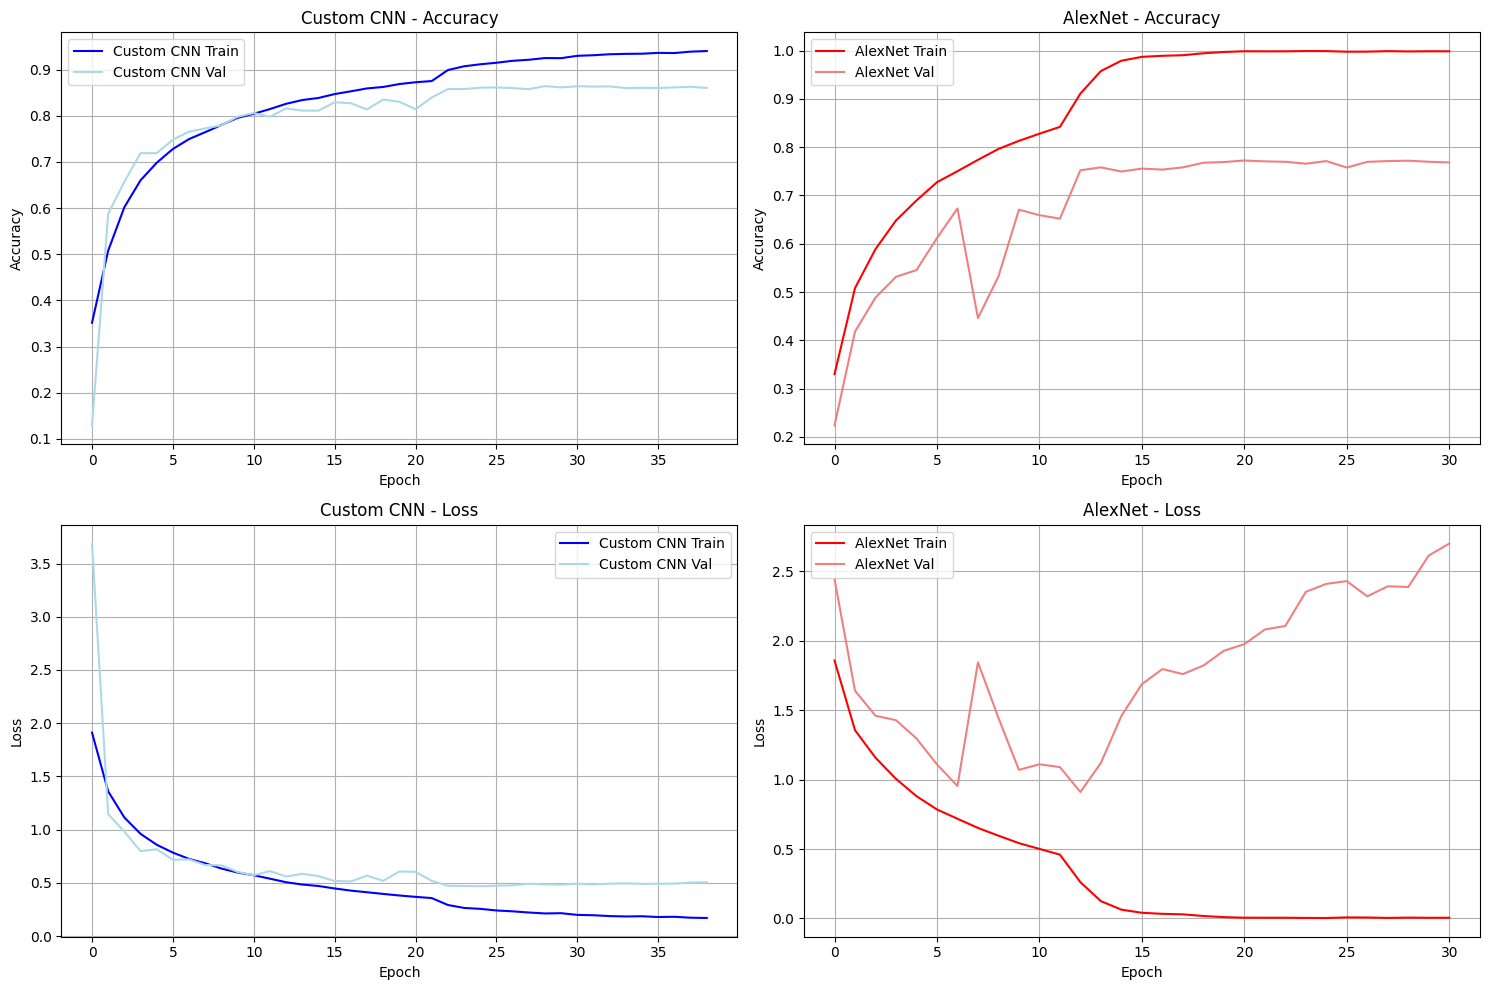

In [11]:
# Plot training history
def plot_training_history(custom_history, alexnet_history):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Accuracy plots
    axes[0, 0].plot(custom_history.history['accuracy'], label='Custom CNN Train', color='blue')
    axes[0, 0].plot(custom_history.history['val_accuracy'], label='Custom CNN Val', color='lightblue')
    axes[0, 0].set_title('Custom CNN - Accuracy')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].legend()
    axes[0, 0].grid(True)
    
    axes[0, 1].plot(alexnet_history.history['accuracy'], label='AlexNet Train', color='red')
    axes[0, 1].plot(alexnet_history.history['val_accuracy'], label='AlexNet Val', color='lightcoral')
    axes[0, 1].set_title('AlexNet - Accuracy')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Accuracy')
    axes[0, 1].legend()
    axes[0, 1].grid(True)
    
    # Loss plots
    axes[1, 0].plot(custom_history.history['loss'], label='Custom CNN Train', color='blue')
    axes[1, 0].plot(custom_history.history['val_loss'], label='Custom CNN Val', color='lightblue')
    axes[1, 0].set_title('Custom CNN - Loss')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Loss')
    axes[1, 0].legend()
    axes[1, 0].grid(True)
    
    axes[1, 1].plot(alexnet_history.history['loss'], label='AlexNet Train', color='red')
    axes[1, 1].plot(alexnet_history.history['val_loss'], label='AlexNet Val', color='lightcoral')
    axes[1, 1].set_title('AlexNet - Loss')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Loss')
    axes[1, 1].legend()
    axes[1, 1].grid(True)
    
    plt.tight_layout()
    plt.show()

plot_training_history(custom_cnn_history, alexnet_history)

## Comparative Analysis

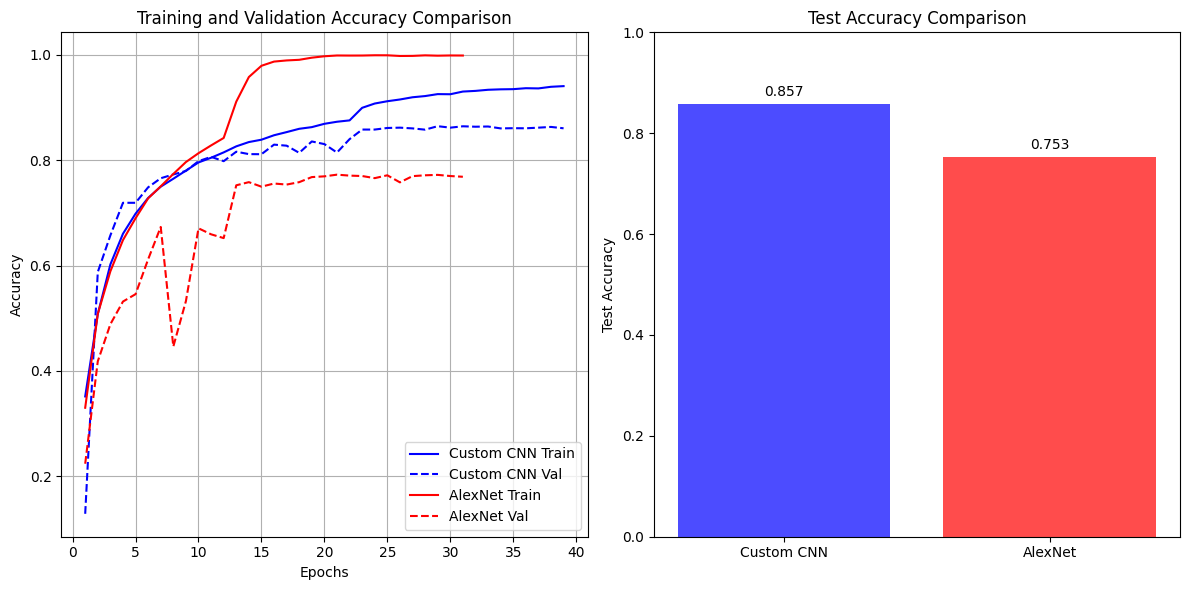

In [12]:
# Comparative accuracy plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
epochs_range = range(1, len(custom_cnn_history.history['accuracy']) + 1)
plt.plot(epochs_range, custom_cnn_history.history['accuracy'], 'b-', label='Custom CNN Train')
plt.plot(epochs_range, custom_cnn_history.history['val_accuracy'], 'b--', label='Custom CNN Val')

epochs_range_alex = range(1, len(alexnet_history.history['accuracy']) + 1)
plt.plot(epochs_range_alex, alexnet_history.history['accuracy'], 'r-', label='AlexNet Train')
plt.plot(epochs_range_alex, alexnet_history.history['val_accuracy'], 'r--', label='AlexNet Val')

plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
models = ['Custom CNN', 'AlexNet']
test_accuracies = [custom_cnn_test_accuracy, alexnet_test_accuracy]
colors = ['blue', 'red']

bars = plt.bar(models, test_accuracies, color=colors, alpha=0.7)
plt.title('Test Accuracy Comparison')
plt.ylabel('Test Accuracy')
plt.ylim(0, 1)

# Add value labels on bars
for bar, acc in zip(bars, test_accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Confusion Matrix and Classification Reports

In [13]:
# Generate classification reports
print("Classification Report - Custom CNN:")
print(classification_report(true_classes, custom_cnn_pred_classes, target_names=class_names))

print("\nClassification Report - AlexNet:")
print(classification_report(true_classes, alexnet_pred_classes, target_names=class_names))

Classification Report - Custom CNN:
              precision    recall  f1-score   support

    airplane       0.88      0.86      0.87      1000
  automobile       0.93      0.94      0.93      1000
        bird       0.80      0.79      0.80      1000
         cat       0.74      0.70      0.72      1000
        deer       0.83      0.86      0.85      1000
         dog       0.79      0.79      0.79      1000
        frog       0.89      0.89      0.89      1000
       horse       0.89      0.89      0.89      1000
        ship       0.90      0.93      0.91      1000
       truck       0.91      0.91      0.91      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000


Classification Report - AlexNet:
              precision    recall  f1-score   support

    airplane       0.76      0.80      0.78      1000
  automobile       0.85      0.89      0.87      1000
        

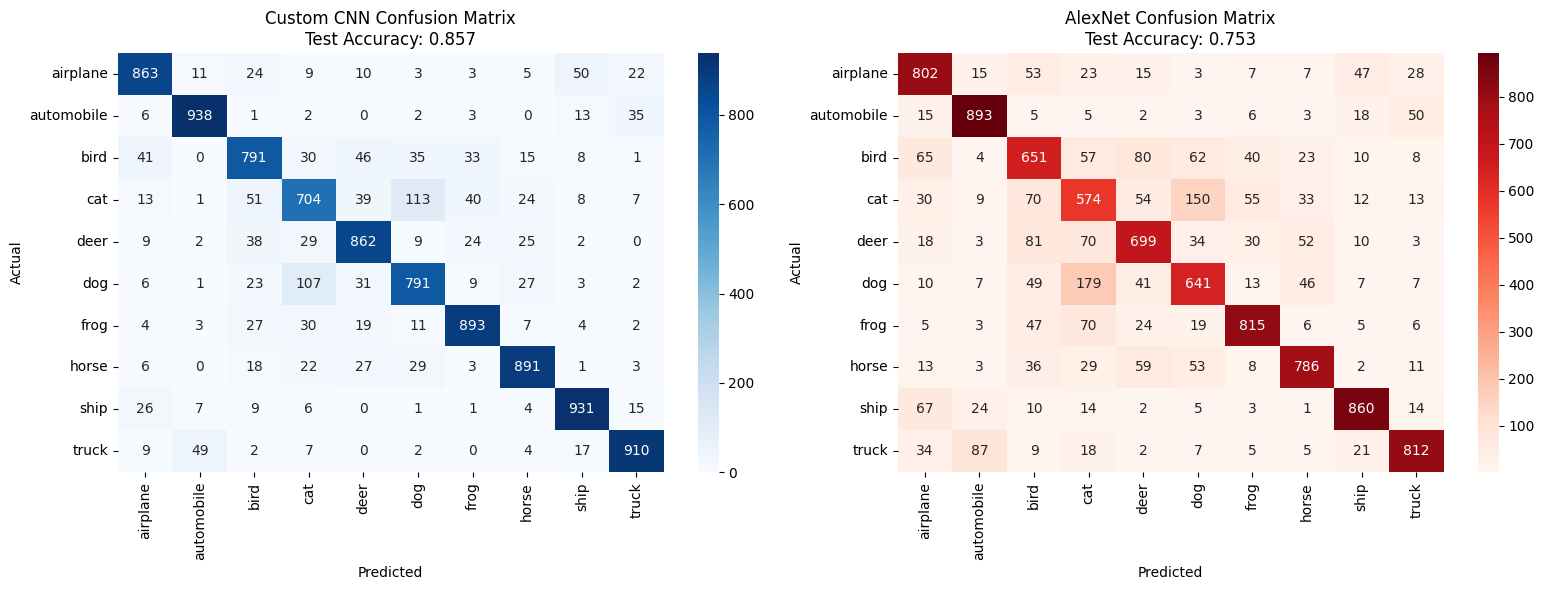

In [14]:
# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Custom CNN confusion matrix
cm_custom = confusion_matrix(true_classes, custom_cnn_pred_classes)
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_title(f'Custom CNN Confusion Matrix\nTest Accuracy: {custom_cnn_test_accuracy:.3f}')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# AlexNet confusion matrix
cm_alexnet = confusion_matrix(true_classes, alexnet_pred_classes)
sns.heatmap(cm_alexnet, annot=True, fmt='d', cmap='Reds', 
            xticklabels=class_names, yticklabels=class_names, ax=axes[1])
axes[1].set_title(f'AlexNet Confusion Matrix\nTest Accuracy: {alexnet_test_accuracy:.3f}')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

## Model Complexity Analysis

In [15]:
# Calculate model parameters and complexity
def count_parameters(model):
    return model.count_params()

custom_cnn_params = count_parameters(custom_cnn)
alexnet_params = count_parameters(alexnet_model)

print("Model Complexity Analysis:")
print(f"Custom CNN:")
print(f"  - Total Parameters: {custom_cnn_params:,}")
print(f"  - Training Time: {custom_cnn_training_time:.2f} seconds")
print(f"  - Test Accuracy: {custom_cnn_test_accuracy:.4f}")

print(f"\nAlexNet:")
print(f"  - Total Parameters: {alexnet_params:,}")
print(f"  - Training Time: {alexnet_training_time:.2f} seconds")
print(f"  - Test Accuracy: {alexnet_test_accuracy:.4f}")

print(f"\nParameter Ratio: AlexNet has {alexnet_params/custom_cnn_params:.1f}x more parameters than Custom CNN")

Model Complexity Analysis:
Custom CNN:
  - Total Parameters: 1,472,938
  - Training Time: 257.18 seconds
  - Test Accuracy: 0.8574

AlexNet:
  - Total Parameters: 37,324,554
  - Training Time: 892.38 seconds
  - Test Accuracy: 0.7533

Parameter Ratio: AlexNet has 25.3x more parameters than Custom CNN


## Sample Predictions Visualization

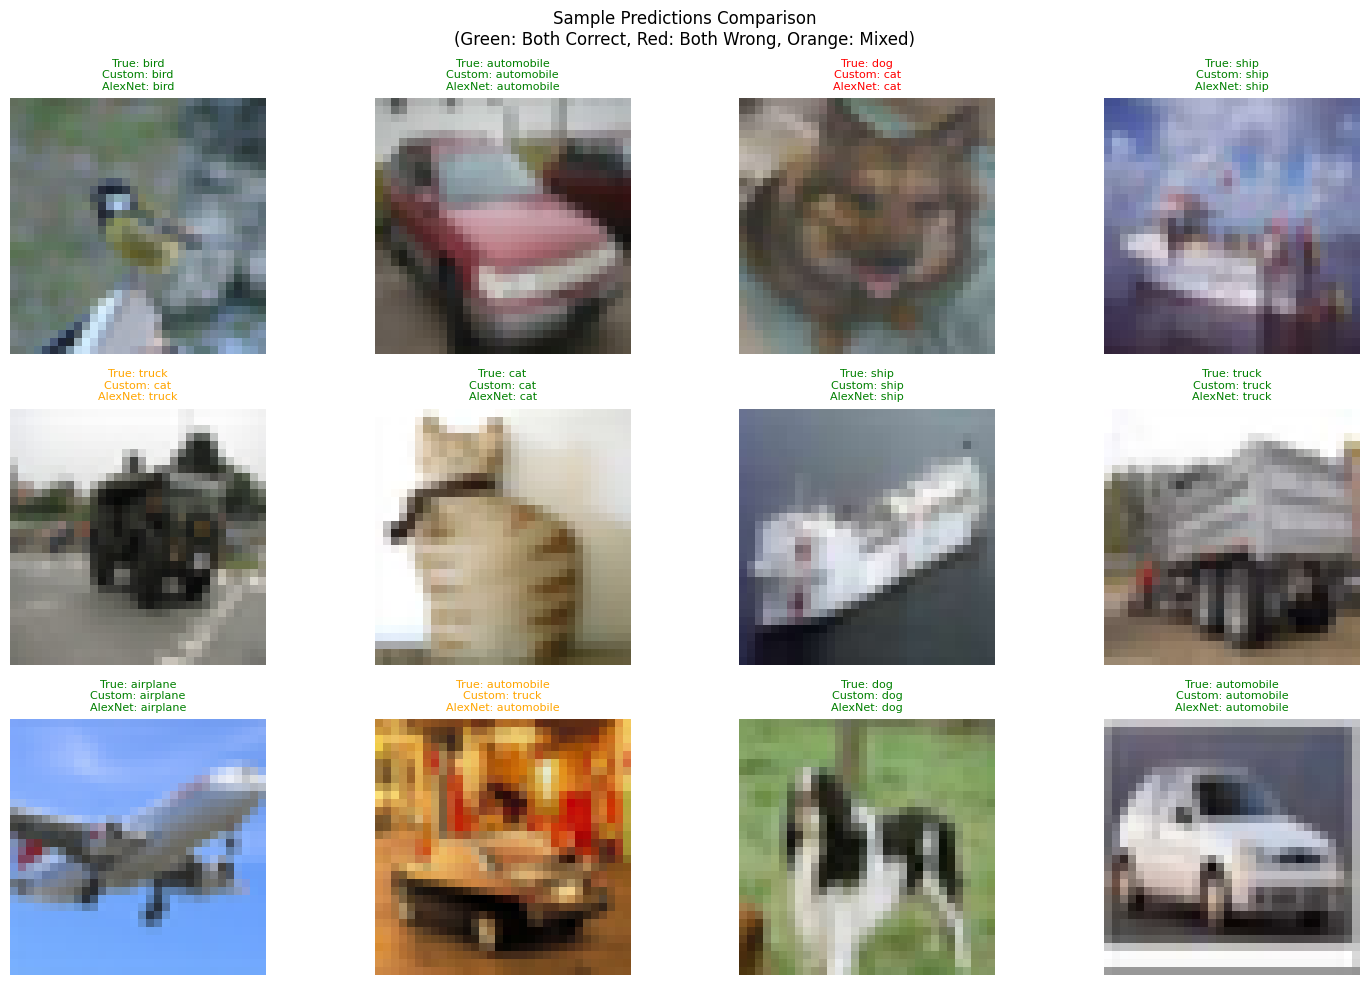

In [16]:
# Visualize some predictions
def plot_predictions(images, true_labels, custom_predictions, alexnet_predictions, class_names, num_samples=12):
    plt.figure(figsize=(15, 10))
    
    for i in range(num_samples):
        plt.subplot(3, 4, i + 1)
        plt.imshow(images[i])
        
        true_class = class_names[true_labels[i]]
        custom_pred_class = class_names[custom_predictions[i]]
        alexnet_pred_class = class_names[alexnet_predictions[i]]
        
        # Color code: green if both correct, red if both wrong, yellow if mixed
        custom_correct = custom_predictions[i] == true_labels[i]
        alexnet_correct = alexnet_predictions[i] == true_labels[i]
        
        if custom_correct and alexnet_correct:
            color = 'green'
        elif not custom_correct and not alexnet_correct:
            color = 'red'
        else:
            color = 'orange'
        
        plt.title(f'True: {true_class}\nCustom: {custom_pred_class}\nAlexNet: {alexnet_pred_class}', 
                 fontsize=8, color=color)
        plt.axis('off')
    
    plt.suptitle('Sample Predictions Comparison\n(Green: Both Correct, Red: Both Wrong, Orange: Mixed)', 
                fontsize=12)
    plt.tight_layout()
    plt.show()

# Show some random predictions
random_indices = np.random.choice(len(x_test), 12, replace=False)
plot_predictions(x_test[random_indices], true_classes[random_indices], 
                custom_cnn_pred_classes[random_indices], alexnet_pred_classes[random_indices], 
                class_names)

## Final Performance Summary and Analysis

In [17]:
print("="*80)
print("CIFAR-10 CLASSIFICATION - FINAL PERFORMANCE SUMMARY")
print("="*80)

print(f"\n📊 TEST ACCURACY RESULTS:")
print(f"Custom CNN:  {custom_cnn_test_accuracy:.4f} ({custom_cnn_test_accuracy*100:.2f}%)")
print(f"AlexNet:     {alexnet_test_accuracy:.4f} ({alexnet_test_accuracy*100:.2f}%)")

if custom_cnn_test_accuracy > alexnet_test_accuracy:
    winner = "Custom CNN"
    difference = custom_cnn_test_accuracy - alexnet_test_accuracy
else:
    winner = "AlexNet"
    difference = alexnet_test_accuracy - custom_cnn_test_accuracy

print(f"\n🏆 WINNER: {winner} (by {difference*100:.2f} percentage points)")

print(f"\n⚙️ MODEL COMPLEXITY:")
print(f"Custom CNN Parameters:  {custom_cnn_params:,}")
print(f"AlexNet Parameters:     {alexnet_params:,}")
print(f"Parameter Ratio:        {alexnet_params/custom_cnn_params:.1f}x")

print(f"\n⏱️ TRAINING TIME:")
print(f"Custom CNN:  {custom_cnn_training_time:.2f} seconds")
print(f"AlexNet:     {alexnet_training_time:.2f} seconds")

print(f"\n📈 OBSERVATIONS AND ANALYSIS:")
print(f"\n1. ACCURACY COMPARISON:")
if custom_cnn_test_accuracy > alexnet_test_accuracy:
    print(f"   • Custom CNN outperformed AlexNet by {difference*100:.2f}%")
    print(f"   • This suggests that the custom architecture is better suited for CIFAR-10")
else:
    print(f"   • AlexNet outperformed Custom CNN by {difference*100:.2f}%")
    print(f"   • This demonstrates the power of the proven AlexNet architecture")

print(f"\n2. MODEL EFFICIENCY:")
custom_efficiency = custom_cnn_test_accuracy / (custom_cnn_params / 1000000)
alexnet_efficiency = alexnet_test_accuracy / (alexnet_params / 1000000)
print(f"   • Custom CNN Efficiency: {custom_efficiency:.3f} (accuracy per million parameters)")
print(f"   • AlexNet Efficiency: {alexnet_efficiency:.3f} (accuracy per million parameters)")

if custom_efficiency > alexnet_efficiency:
    print(f"   • Custom CNN is more parameter-efficient")
else:
    print(f"   • AlexNet achieves better accuracy despite having more parameters")

print(f"\n3. ARCHITECTURE INSIGHTS:")
print(f"   • Custom CNN uses modern techniques: Batch Normalization, Dropout")
print(f"   • AlexNet adapted from 224x224 to 32x32 input size")
print(f"   • Both models benefit from data normalization and proper regularization")

print(f"\n4. PRACTICAL CONSIDERATIONS:")
if custom_cnn_training_time < alexnet_training_time:
    print(f"   • Custom CNN trains {alexnet_training_time/custom_cnn_training_time:.1f}x faster")
else:
    print(f"   • AlexNet trains {custom_cnn_training_time/alexnet_training_time:.1f}x faster")
print(f"   • Model size affects deployment and inference speed")
print(f"   • Custom architectures can be optimized for specific datasets")

print(f"\n" + "="*80)
print(f"CONCLUSION: The {winner} model provides the best performance for CIFAR-10 classification")
print(f"in terms of test accuracy, achieving {max(custom_cnn_test_accuracy, alexnet_test_accuracy)*100:.2f}% accuracy.")
print("="*80)

CIFAR-10 CLASSIFICATION - FINAL PERFORMANCE SUMMARY

📊 TEST ACCURACY RESULTS:
Custom CNN:  0.8574 (85.74%)
AlexNet:     0.7533 (75.33%)

🏆 WINNER: Custom CNN (by 10.41 percentage points)

⚙️ MODEL COMPLEXITY:
Custom CNN Parameters:  1,472,938
AlexNet Parameters:     37,324,554
Parameter Ratio:        25.3x

⏱️ TRAINING TIME:
Custom CNN:  257.18 seconds
AlexNet:     892.38 seconds

📈 OBSERVATIONS AND ANALYSIS:

1. ACCURACY COMPARISON:
   • Custom CNN outperformed AlexNet by 10.41%
   • This suggests that the custom architecture is better suited for CIFAR-10

2. MODEL EFFICIENCY:
   • Custom CNN Efficiency: 0.582 (accuracy per million parameters)
   • AlexNet Efficiency: 0.020 (accuracy per million parameters)
   • Custom CNN is more parameter-efficient

3. ARCHITECTURE INSIGHTS:
   • Custom CNN uses modern techniques: Batch Normalization, Dropout
   • AlexNet adapted from 224x224 to 32x32 input size
   • Both models benefit from data normalization and proper regularization

4. PRACTICAL